In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
home = os.getcwd()
home

'/content'

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 44.4 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import userdata
roboflowAPI = userdata.get('roboflow_api')

In [6]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key=roboflowAPI)
project = rf.workspace("neural-ocean").project("neural_ocean")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov11:: 100%|██████████| 10266/10266 [00:02<00:00, 4131.55it/s]


In [8]:
import torch
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=99589cd8-17d6-c167-a2d2-456827b1ea0c, L2_cache_size=4MB)


In [11]:
!yolo task = detect \
mode = train \
model = yolo11n.pt \
data={dataset.location}/data.yaml \
epochs = 20 \
imgsz=640 \
project=/content/drive/MyDrive/Models \
name=neural_ocean

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Neural_Ocean-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Models, name=neural_ocean, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

In [9]:
!yolo task=detect \
mode=predict \
model=/content/drive/MyDrive/Models/neural_ocean/weights/best.pt \
conf=0.25 \
source={dataset.location}/test/images

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs

image 1/501 /content/Neural_Ocean-3/test/images/1bc7-iudfmpmn7245599_jpg.rf.0c27f6617b1c2d7665a4badbb8474e28.jpg: 640x640 1 glove, 1 net, 8.7ms
image 2/501 /content/Neural_Ocean-3/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.2cb8ff79c143c7677ba333349c528e23.jpg: 640x640 1 can, 1 plastic, 17.0ms
image 3/501 /content/Neural_Ocean-3/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.6e27d3429e5c183f0785e36626e232c2.jpg: 640x640 1 Mask, 1 glove, 10.7ms
image 4/501 /content/Neural_Ocean-3/test/images/7_JPG_jpg.rf.c73c6cc42828be1d9a13a8a520607ca8.jpg: 640x640 1 Mask, 16.2ms
image 5/501 /content/Neural_Ocean-3/test/images/GettyImages-1227891345-1000x667_jpg.rf.463d0f90b57eac0801f0a335a754dd23.jpg: 640x640 3 Masks, 13.4ms
image 6/501 /content/Neural_Ocean-3/test/images/GettyImageskl-1227891345-1000

In [11]:
!yolo predict model=/content/drive/MyDrive/Models/neural_ocean/weights/best.pt source='/content/demo.jpg'

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/demo.jpg: 640x640 1 Mask, 14.0ms
Speed: 4.8ms preprocess, 14.0ms inference, 675.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [12]:
from google.colab.patches import cv2_imshow



image 1/1 /content/demo.jpg: 640x640 1 Mask, 12.4ms
Speed: 5.5ms preprocess, 12.4ms inference, 688.1ms postprocess per image at shape (1, 3, 640, 640)


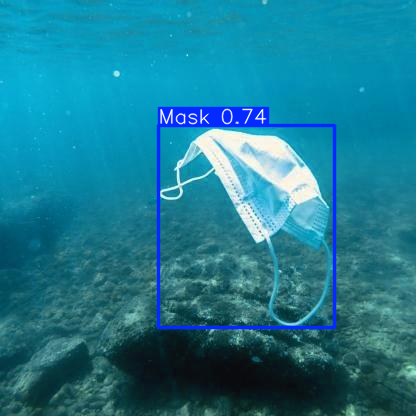

In [13]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/Models/neural_ocean/weights/best.pt')
results = model('/content/demo.jpg')
res_plotted = results[0].plot()
cv2_imshow(res_plotted)